# EigenFaces and A Simple Face Detector with PCA/SVD in Python
https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

In [1]:
import sys
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from matplotlib import cm

2994


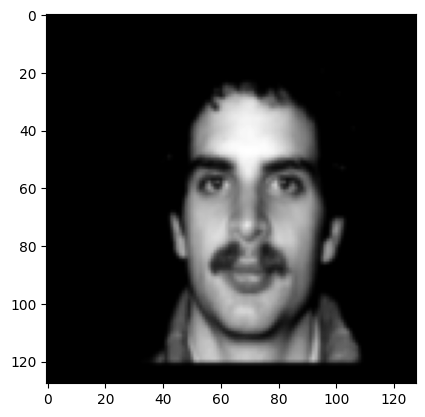

In [2]:
original_images = list()
#Open available images randomly
for i in np.random.randint(1223,5222,3000):
    try:
        #Open file
        original_images.append(np.reshape(np.fromfile("rawdata/rawdata/"+str(i),dtype=np.uint8),(128,128))) #Agregarlas si existe el directorio
    except:
        pass

#Test images length
print(len(original_images))
#Display an image
plt.imshow(original_images[5],cmap=cm.gray)

In [3]:
min_rows, min_cols = sys.maxsize, sys.maxsize
max_rows, max_cols = 0, 0
for (i, image) in enumerate(original_images):
    r, c = image.shape[0], image.shape[1]    
    min_rows = min(min_rows, r)
    max_rows = max(max_rows, r)
    min_cols = min(min_cols, c)
    max_cols = max(max_cols, c)
    
print("\n==> Least common image size:", min_rows, "x", min_cols, "pixels")


==> Least common image size: 128 x 128 pixels


In [4]:
def recenter(image, min_rows, min_cols):
    r, c = image.shape
    top, bot, left, right = 0, r, 0, c
    if r > min_rows:
        top = r - min_rows  
    if c > min_cols:
        right = min_cols     
    return image[top:bot, left:right]

In [5]:
test_img = list()
for img in original_images:
    test_img.append(recenter(img,min_rows,min_cols))
    
#X = list()
#for img in test_img:
#    X.append(img.flatten)

In [6]:
# Create m x d data matrix
m = len(test_img)
d = min_rows * min_cols
X = np.reshape(test_img, (m, d))

# Applying PCA

In [7]:
#Compute the SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Sanity check on dimensions
print("X:", X.shape)
print("U:", U.shape)
print("Sigma:", S.shape)
print("V^T:", VT.shape)

X: (2994, 16384)
U: (2994, 2994)
Sigma: (2994,)
V^T: (2994, 16384)


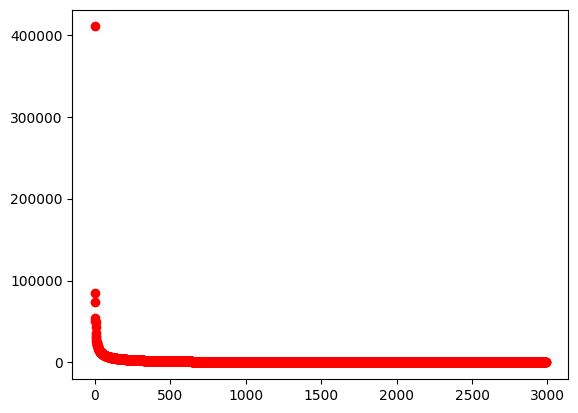

In [8]:
#Decay of singular values.
plt.plot(S, 'ro')

(2994, 2)


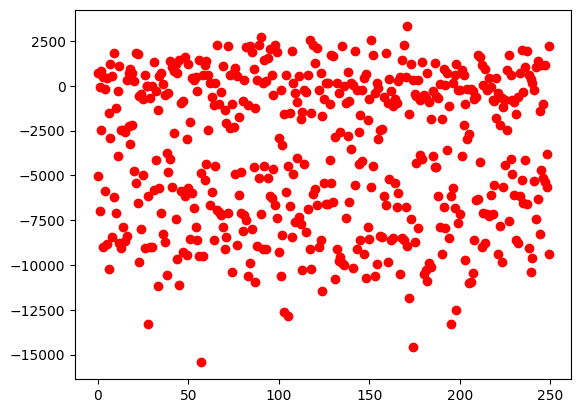

In [20]:
# Number of principal components
num_components = 2
# Projection of the dataset on the selected components
Y = np.matmul(X, VT[:num_components,:].T)
#Plot distrubtion of the firs images
plt.plot(Y[:250,:], 'ro')

## Computing eigenvectors

In [51]:
# Number of components
components = 200

# Mean value of images
means = X.mean(axis=0)
# Size of mean vector (must be the number of pixels)
print("mean shape: ",means.shape)
# A matrix
A = (X-means).T
# Size of A
print("A shape: ",A.shape)

mean shape:  (16384,)
A shape:  (16384, 2994)


In [52]:
# A transposed * A to get a MxM sized matrix
M = A.T @ A
#Size of At * A
print("At * A shape: ",M.shape)

At * A shape:  (2994, 2994)


In [53]:
mi, V = np.linalg.eig(M) #Obtener los eigenvectores y eigenvalores
mi = np.abs(mi) #Obtener la magnitud de los eigenvalores
print("V shape: ",V.shape) #Tamaño de la matriz de eigenvectores
print(mi.shape) #Tamaño de la matriz de eigenvalores

V shape:  (2994, 2994)
(2994,)


In [54]:
#Indices ordenados de forma descendente segun la magnitud de los eigenvalores
sorted_i = np.argsort(mi)
sorted_i = np.flip(sorted_i)

u = np.array([]) #Arreglo para guardar los eigenvectores de la matriz de covarianza
for i in sorted_i[:components]: #Para cada eigenvalor
    res = A @ V[:,i].T #Obtener el vector de la matriz de covarianza correspondiente al eigenvalor
    ui = res / np.linalg.norm(res) #Normalizar
    
    if len(u)==0: #Guardar el vector si la matriz esta vacia
        u = ui
    else: #Apilar el valor en la matriz de eigenvectores
        u = np.vstack((u,ui))

u = u.T
print(u.shape)

(16384, 200)


(200, 16384)


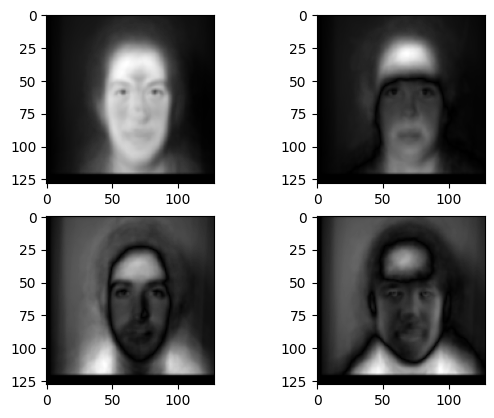

In [55]:
y = np.diag(mi[:components]) @ u.T #Eigenvectores mutliplicados por sus eigenvalores
print(y.shape)
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.reshape(np.abs(y[0,:]),(128,128)),cmap=cm.gray) #Mostrar algunas de las caracteristicas mas significativas
axs[0, 1].imshow(np.reshape(np.abs(y[1,:]),(128,128)),cmap=cm.gray) #Mostrar algunas de las caracteristicas mas significativas
axs[1, 0].imshow(np.reshape(np.abs(y[2,:]),(128,128)),cmap=cm.gray) #Mostrar algunas de las caracteristicas mas significativas
axs[1, 1].imshow(np.reshape(np.abs(y[3,:]),(128,128)),cmap=cm.gray) #Mostrar algunas de las caracteristicas mas significativas

## Image Reconstruction

(16384,)


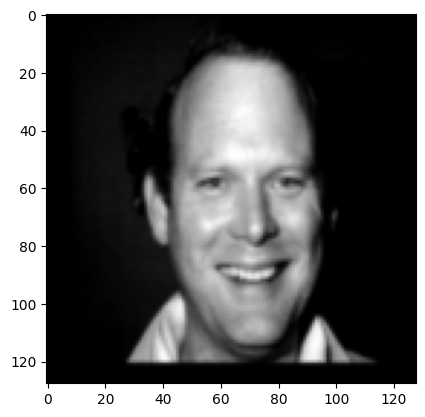

In [56]:
Timage = np.reshape(np.fromfile("rawdata/rawdata/4877",dtype=np.uint8),(128,128)) #Imagen de prueba 1, de los datos de prueba en /rawdata

Timage2 = Image.open("test.jpg").convert("L") #Imagen de prueba 2
Timage2 = Timage2.resize((128,128))

Timage = recenter(np.array(Timage),min_rows,min_cols) #Recentrar la imagen
Timage2 = recenter(np.array(Timage2),min_rows,min_cols) #Recentrar la imagen

plt.imshow(Timage,cmap=cm.gray) #Mostrar la imagen de prueba 1
x1 = Timage.flatten() #Imagen en forma de vector de una dimension
x2 = Timage2.flatten() #Imagen en forma de vector de una dimension

print(x1.shape)

In [57]:
k = range(0,components,1) #Numero de valores caracteristicos a tomar para la prueba

### Prueba 1

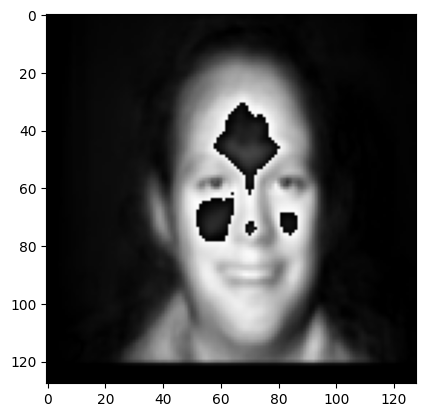

In [58]:
frames = [] #Arreglo para guardar la animacion
values, residuals, rank, singular = np.linalg.lstsq(u,x1,rcond=None) #Obtener los eigenvalores de la imagen segun los vectores caracteristicos

#Indices ordenados de forma descendente segun la magnitud de los eigenvalores
sorted = np.argsort(values)
sorted = np.flip(sorted_i)

#Para cada frame con un determinado numero de caracteristicas
for f in k:#sorted[:components]:
    reconstruct = u[:,:f] @ values[:f] #Multiplicar los eigenvectores por los valores caracteristicos
    reconstruct = np.reshape(abs(reconstruct + means),(128,128)) #Reconstruir el vector en una imagen
    #print(np.max(reconstruct))
    resIm = Image.fromarray(reconstruct.astype(np.uint8)).convert("P")
    plt.imshow(resIm)
    frames.append(resIm) #Agregar la imagen a la lista de frames
    #frames.append(reconstruct)

frames[0].save('res1.gif',
               save_all=True, append_images=frames[1:], optimize=False, duration=50, loop=0) #Guardar los frames en un gif

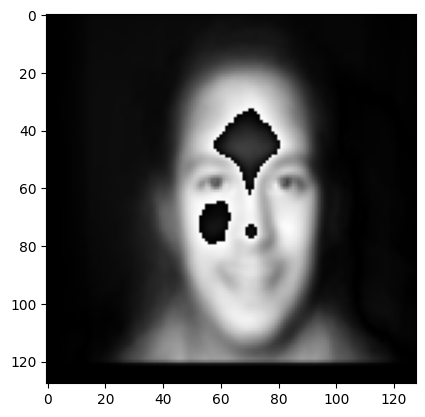

In [59]:
plt.imshow(frames[30],cmap=cm.gray)

### Prueba 2

C:\Users\dark_\AppData\Local\Temp\ipykernel_23532\3103969136.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  resIm = Image.fromarray(reconstruct.astype(np.uint8)).convert("P")


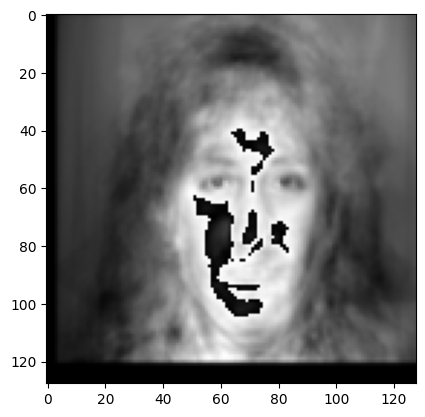

In [60]:
frames = [] #Arreglo para guardar la animacion
values, residuals, rank, singular = np.linalg.lstsq(u,x2,rcond=None) #Obtener los eigenvalores de la imagen segun los vectores caracteristicos
#Para cada frame con un determinado numero de caracteristicas
for f in k:
    reconstruct = u[:,:f] @ values[:f] #Multiplicar los eigenvectores por los valores caracteristicos
    reconstruct = np.reshape(reconstruct+means,(128,128)) #Reconstruir el vector en una imagen
    resIm = Image.fromarray(reconstruct.astype(np.uint8)).convert("P")
    plt.imshow(resIm)
    frames.append(resIm) #Agregar la imagen a la lista de frames
    #frames.append(Image.fromarray(reconstruct).convert("P")) #Agregar la imagen a la lista de frames

frames[0].save('res2.gif',
               save_all=True, append_images=frames[1:], optimize=False, duration=50, loop=0) #Guardar los frames en un gif

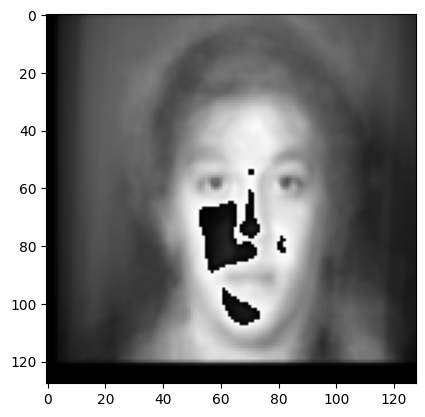

In [46]:
plt.imshow(frames[30],cmap=cm.gray)